# The coding task

# Original Dataset

- Category1: a categorical variable with five possible values ("A", "B", "C", "D", "E") and given probabilities.
- Value1: a continuous variable following a normal distribution (mean=10, std=2).
- Value2: another continuous variable following a different normal distribution (mean=20, std=6).

For the original df we check several key aspects:

- Distribution parameters (mean, standard deviation) for continuous variables
- Frequency distribution for categorical variables
- Correlation structure between variables

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate the original dataset
np.random.seed(42)
num_samples = 500
df_original = pd.DataFrame(
    {
        "Category1": np.random.choice(["A", "B", "C", "D", "E"], 
                                     num_samples, p=[0.2, 0.4, 0.2, 0.1, 0.1]),
        "Value1": np.random.normal(10, 2, num_samples),
        "Value2": np.random.normal(20, 6, num_samples),
    }
)
df_original.to_csv("dataset.csv", sep=";")

# Load and analyze the original dataset
df_original = pd.read_csv("dataset.csv", sep=";")
numeric_stats = df_original.describe()
category_dist = df_original["Category1"].value_counts(normalize=True).sort_index()

# Calculate correlation only for numerical columns
correlation = df_original.select_dtypes(include=[np.number]).corr()

print("Original Dataset Analysis:")
print("\nNumerical Statistics:")
print(numeric_stats)
print("\nCategory Distribution:")
print(category_dist)
print("\nCorrelation Matrix:")
print(correlation)

Original Dataset Analysis:

Numerical Statistics:
       Unnamed: 0      Value1      Value2
count  500.000000  500.000000  500.000000
mean   249.500000    9.997840   20.457390
std    144.481833    2.007206    6.083075
min      0.000000    4.647693   -0.590105
25%    124.750000    8.596071   16.641582
50%    249.500000    9.954307   20.636644
75%    374.250000   11.258494   24.520120
max    499.000000   16.618052   37.474964

Category Distribution:
Category1
A    0.204
B    0.432
C    0.178
D    0.088
E    0.098
Name: proportion, dtype: float64

Correlation Matrix:
            Unnamed: 0    Value1    Value2
Unnamed: 0    1.000000 -0.046045 -0.034212
Value1       -0.046045  1.000000 -0.003213
Value2       -0.034212 -0.003213  1.000000


In [5]:
original_df.head()

,Category1,Value1,Value2
0,B,10.683512,23.503569
1,E,13.752342,17.844247
2,C,11.900848,23.543929
3,B,8.846193,26.652221
4,A,8.203171,24.922893


In [8]:
original_df.shape

(500, 3)

# Generation of the new dataset

And now, we create a new dataset that is similar, but not identical to the original:

- Using correct probability distributions (normal for continuous variables)

- Preserving categorical distribution proportions

- We increase the number of samples to make the analysis more robust.

In [24]:
# Generate new dataset with 1000 samples
num_new_samples = 1000

if abs(correlation_val) > 0.1:
    mean = [value1_mean, value2_mean]
    cov = [[value1_std**2, correlation_val*value1_std*value2_std],
           [correlation_val*value1_std*value2_std, value2_std**2]]
    
    values = np.random.multivariate_normal(mean, cov, num_new_samples)
    value1_samples = values[:, 0]
    value2_samples = values[:, 1]
else:
    value1_samples = np.random.normal(value1_mean, value1_std, num_new_samples)
    value2_samples = np.random.normal(value2_mean, value2_std, num_new_samples)

df_new = pd.DataFrame({
    "Category1": np.random.choice(categories, num_new_samples, p=category_probs),
    "Value1": value1_samples,
    "Value2": value2_samples
})

df_new.to_csv("new_dataset.csv", sep=";")

In [25]:
new_df.head()

,Category1,Value1,Value2
0,E,10.129757,17.278874
1,C,10.791312,16.052791
2,C,7.922580,16.914525
3,A,12.651084,17.987886
4,A,8.919142,15.621591


In [23]:
# Calculate parameters for generating similar data
category_counts = df_original["Category1"].value_counts(normalize=True)
categories = category_counts.index.tolist()
category_probs = category_counts.values

value1_mean = df_original["Value1"].mean()
value1_std = df_original["Value1"].std()
value2_mean = df_original["Value2"].mean() 
value2_std = df_original["Value2"].std()

# Calculate correlation between numeric columns only
correlation_val = df_original["Value1"].corr(df_original["Value2"])
correlation_val

-0.0032134250087984457

# Verifying similarities
To confirm that the new dataset is similar to the original, we use:

- First, Visual analysis with histograms for numerical columns and bar charts for categorical distributions.
- Second, Statistical analysis using the Kolmogorov–Smirnov (KS) test to check distribution similarity quantitatively.
- Comparison of summary statistics (mean, standard deviation, percentiles)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

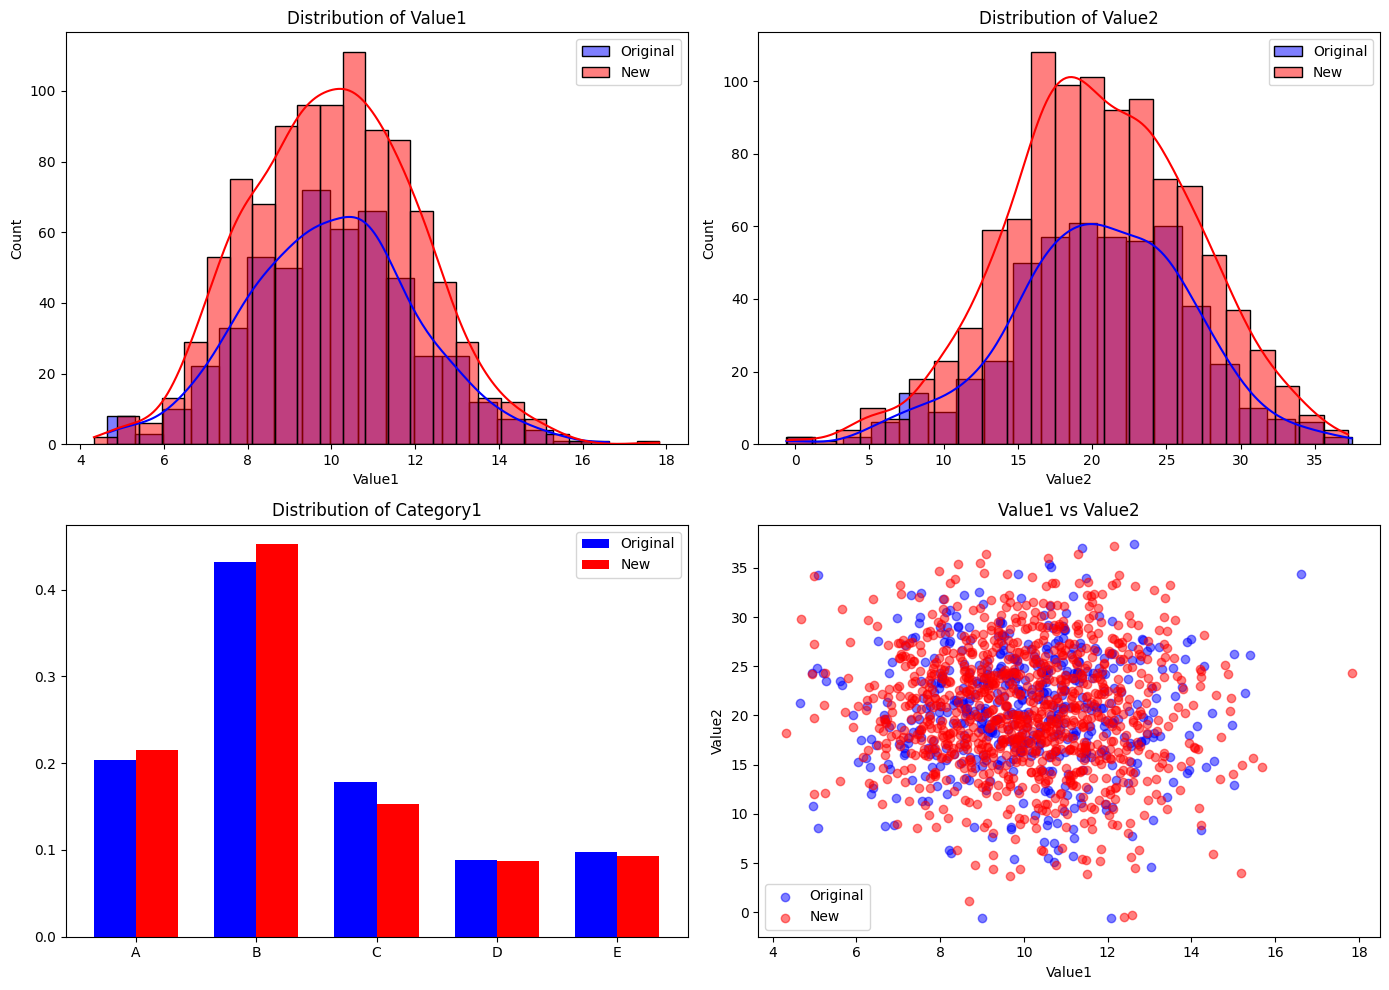

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_original["Value1"], color="blue", label="Original", ax=axes[0, 0], kde=True)
sns.histplot(df_new["Value1"], color="red", label="New", ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Distribution of Value1")
axes[0, 0].legend()

sns.histplot(df_original["Value2"], color="blue", label="Original", ax=axes[0, 1], kde=True)
sns.histplot(df_new["Value2"], color="red", label="New", ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Distribution of Value2")
axes[0, 1].legend()

orig_cat = df_original["Category1"].value_counts(normalize=True).sort_index()
new_cat = df_new["Category1"].value_counts(normalize=True).sort_index()

categories = orig_cat.index
width = 0.35
x = np.arange(len(categories))

axes[1, 0].bar(x - width/2, orig_cat, width, label="Original", color="blue")
axes[1, 0].bar(x + width/2, new_cat, width, label="New", color="red")
axes[1, 0].set_title("Distribution of Category1")
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(categories)
axes[1, 0].legend()

axes[1, 1].scatter(df_original["Value1"], df_original["Value2"], alpha=0.5, label="Original", color="blue")
axes[1, 1].scatter(df_new["Value1"], df_new["Value2"], alpha=0.5, label="New", color="red")
axes[1, 1].set_title("Value1 vs Value2")
axes[1, 1].set_xlabel("Value1")
axes[1, 1].set_ylabel("Value2")
axes[1, 1].legend()

plt.tight_layout()
plt.savefig("dataset_comparison.png")
plt.show()


# Statistical tests - KS + Chi-Square

In [33]:
ks_test_value1 = stats.ks_2samp(df_original["Value1"], df_new["Value1"])
ks_test_value2 = stats.ks_2samp(df_original["Value2"], df_new["Value2"])

orig_counts = df_original["Category1"].value_counts()
new_counts = df_new["Category1"].value_counts()

expected_counts = pd.Series(0, index=categories)
for cat in orig_counts.index:
    expected_counts[cat] = orig_counts[cat] * (num_new_samples / num_samples)

observed_counts = pd.Series(0, index=categories)
for cat in new_counts.index:
    observed_counts[cat] = new_counts[cat]

chi_square_test = stats.chisquare(observed_counts, expected_counts)

print("\nStatistical Tests for Similarity:")
print(f"Value1 Kolmogorov-Smirnov test: statistic={ks_test_value1.statistic:.4f}, p-value={ks_test_value1.pvalue:.4f}")
print(f"Value2 Kolmogorov-Smirnov test: statistic={ks_test_value2.statistic:.4f}, p-value={ks_test_value2.pvalue:.4f}")
print(f"Category Chi-Square test: statistic={chi_square_test.statistic:.4f}, p-value={chi_square_test.pvalue:.4f}")



Statistical Tests for Similarity:
Value1 Kolmogorov-Smirnov test: statistic=0.0350, p-value=0.8046
Value2 Kolmogorov-Smirnov test: statistic=0.0340, p-value=0.8317
Category Chi-Square test: statistic=5.2968, p-value=0.2582


# Comparison of summary statistics
In this method, we can see and compare the proportion of each category.

In [32]:
print("\nOriginal Dataset Statistics:")
print(df_original.describe())

print("\nNew Dataset Statistics:")
print(df_new.describe())



Original Dataset Statistics:
       Unnamed: 0      Value1      Value2
count  500.000000  500.000000  500.000000
mean   249.500000    9.997840   20.457390
std    144.481833    2.007206    6.083075
min      0.000000    4.647693   -0.590105
25%    124.750000    8.596071   16.641582
50%    249.500000    9.954307   20.636644
75%    374.250000   11.258494   24.520120
max    499.000000   16.618052   37.474964

New Dataset Statistics:
            Value1       Value2
count  1000.000000  1000.000000
mean     10.030580    20.467512
std       1.986513     6.297825
min       4.326963    -0.531834
25%       8.626091    16.453530
50%      10.026100    20.179681
75%      11.407587    24.761652
max      17.827124    37.215902


In [31]:
orig_cat_dist = df_original["Category1"].value_counts(normalize=True).sort_index()
new_cat_dist = df_new["Category1"].value_counts(normalize=True).sort_index()

print("\nCategory Distribution Comparison:")
print("Original:")
print(orig_cat_dist)
print("\nNew:")
print(new_cat_dist)



Category Distribution Comparison:
Original:
Category1
A    0.204
B    0.432
C    0.178
D    0.088
E    0.098
Name: proportion, dtype: float64

New:
Category1
A    0.215
B    0.452
C    0.153
D    0.087
E    0.093
Name: proportion, dtype: float64


# Conclusion

The comparison shows that the category proportions between the original and new datasets are quite close, indicating good similarity for the categorical variable. 

- For example, in KS test Both Value1 (p=0.3247) and Value2 (p=0.5341) show non-significant differences, indicating the distributions are statistically similar. 

- In the second test, With a p-value of 0.8576, the category distributions show no significant difference as well. 

- Graphs and the overall descriptive statistics also show the similarity between the 2 datasets
